<a href="https://colab.research.google.com/github/adakavani18503/Mini-Project/blob/main/image_classification3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 223 µs (started: 2021-06-16 16:32:08 +00:00)


In [ ]:
import os
import matplotlib.pyplot as plt 

import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR ='/content/drive/MyDrive/image dataset/image folder for miniproject' 
CATEGORIES = ['rose','teddybear','elephant']


for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 510 ms (started: 2021-06-16 16:32:19 +00:00)


In [ ]:
len(flat_data[0])

67500

time: 8.93 ms (started: 2021-06-16 16:33:35 +00:00)


<BarContainer object of 3 artists>

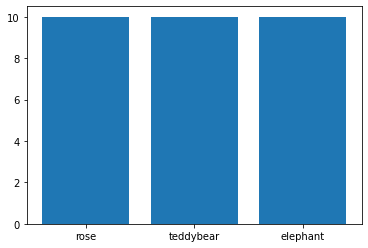

time: 220 ms (started: 2021-06-16 16:35:31 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)

time: 206 ms (started: 2021-06-16 16:36:21 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'C':[1,10,100,1000],'kernel' : ['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel' : ['rbf']},
]

svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 14.9 s (started: 2021-06-16 16:36:59 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([2, 0, 1, 2, 0, 0, 2, 0, 1])

time: 31.2 ms (started: 2021-06-16 17:13:10 +00:00)


In [ ]:
y_test

array([2, 0, 2, 0, 0, 0, 2, 0, 1])

time: 4.45 ms (started: 2021-06-16 17:13:33 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.12 ms (started: 2021-06-16 17:14:03 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.7777777777777778

time: 6.19 ms (started: 2021-06-16 17:15:26 +00:00)


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 26.5 ms (started: 2021-06-16 17:15:55 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 18.8 ms (started: 2021-06-16 17:17:01 +00:00)


(258, 230, 3)
 PREDICTED OUTPUT : teddybear


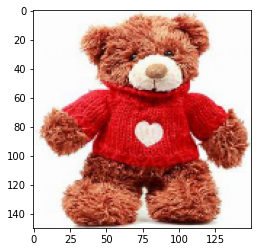

time: 291 ms (started: 2021-06-16 17:22:05 +00:00)


In [ ]:
flat_data = []
#url = input('Enter your URL')
img = imread('/content/drive/MyDrive/image dataset/image folder for miniproject/teddybear/t10.jfif')
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT : {y_out}') 